<a href="https://colab.research.google.com/github/kweerman/demo-repo/blob/main/plot_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Simulatie van een muon die door een blok xenon beweegt**

Het doel van deze opdracht is om de paden van alle deeltjes die ontstaan doordat een muon van 1000GeV door een blok xenon beweegt. Als input hebben we een textfile gecreerd met behulp van FLUKA: een simulatiecode waar alle interacties die de muon kan hebben met zijn omgeving in zijn opgeslagen en worden aangeroepen op het moment dat je een dergelijke muon simuleert. We laten een 1000GeV muon door een blok xenon van 40 bij 40 bij 30 bewegen (-20cm tot 20cm in de x-richting, -20cm tot 20cm in de y-richting en 0cm tot 30cm in de z-richting). De muon wordt vanaf z = -0.1cm door het midden van de blok geschoten. Vervolgens volgt FLUKA het pad van zowel de muon als de paden van alle deeltjes die kunnen onstaan doordat de muon energie verliest terwijl het met de xenon reageert. 

In [2]:
from google.colab import files

uploaded = files.upload()

Saving muons_xenon001_SRCEFILE to muons_xenon001_SRCEFILE


Met behulp van het volgende blok kan je een aantal regels van het bestand printen en bekijken wat er gedaan wordt. Let op, de nummers op de eerste lijn zijn code voor de deeltjes die onstaan. De onderstaand codes zijn nodig voor deze opdracht: 

1 Proton \\
2 Antiproton \\
3 Electron \\
4 Positron \\
5 Electron neutrino \\
6 Electron antineutrino \\
7 Photon \\
8 Neutron \\
9 Antineutron \\
10 Muon+ \\
11 Muon- 

Verander de aantal regels die geprint worden en bedenk wat er in het bestand staat. Hoe worden de deeltjes gevolgd?

In [6]:
srcefile = open("muons_xenon001_SRCEFILE", 'r')
for lines in range(0,20):
  print(srcefile.readline())
srcefile.close()

 Version 2 2022 Kelly Weerman

          10   0.00000000       0.00000000     -0.100000001       0.00000000       0.00000000       0.00000000    

          10   0.00000000       0.00000000       0.00000000       0.00000000       0.00000000      0.485740483    

           3   0.00000000       0.00000000      0.485740483       1.46255024E-06  -8.88714021E-06  0.485750228    

           3   1.46255024E-06  -8.88714021E-06  0.485750228       1.02591719E-02  -1.53694535E-02  0.500753820    

           3   1.02591719E-02  -1.53694535E-02  0.500753820       3.02365664E-02  -2.01735925E-02  0.507594347    

           3   3.02365664E-02  -2.01735925E-02  0.507594347       4.76035215E-02  -1.02382172E-02  0.504861414    

           3   4.76035215E-02  -1.02382172E-02  0.504861414       5.57594001E-02  -1.28254853E-02  0.490956247    

           3   5.57594001E-02  -1.28254853E-02  0.490956247       5.83538041E-02  -2.14512423E-02  0.478478760    

           3   5.83538041E-02  -2.1451242

We kunnen de paden van de deeltjes in lijsten stoppen, zodat deze te plotten zijn met matplotlib. Telkens als er een nieuwe deeltjescode wordt gegenereerd in de textfile, zal je deze moeten volgen met een nieuwe lijst zodat voor elk deeltje zijn pad apart kan worden geplot. Hieronder is er een voorbeeld van hoe je dit zou kunnen aanpakken, maar denk hier eerst zelf overna! Hoe lees ik het bestand in en wat wil ik opslaan?

Let op: er zijn 5 verschillende 'events' gesimuleerd, 5 keer een muon op een blok xenon. Een nieuwe event is aangeduid met een regel nullen.

Het moeilijke van deze opdracht is dat het pad van het deeltje wordt onderbroken op het moment dat dit deeltje met zijn omgeving reageert: in het laatste geval wordt eerst een nieuw deeltje gevolgd, tot die stopt of opnieuw reageert, waarna FLUKA weer teruggaat naar het originele deeltje en daarvan het pad verder volgt. Telkens als er een nieuwe deeltjescode is, moet je die dus apart volgen. Later zullen we kijken of we ook kunnen volgen wat dezelfde deeltjes zijn, maar voor nu is het belangrijk dat het pad opslaat telkens als een ander deeltje gevolgd wordt (dus bv 10 verandert in een 3: sla alle coordinaten van 10 op en begin een nieuwe lijst voor 3, tot er weer een nieuwe generatie gevolgd wordt).

In [ ]:
x_list, y_list, z_list = [[]], [[]], [[]]

# we beginnnen altijd met de muon aangezien we die simuleren
part_gen = 10
part_genlist = [10]
no_part, no_events = 0, 0
srcefile = open("muons_xenon001_SRCEFILE", 'r')

# skip de eerste lijn met tekst
line1 = srcefile.readline()
print(line1)

for line in srcefile:
  data = line.split()
  new_gen, x0, y0, z0, x1, y1, z1 = data

  # let op! we willen dat het getallen zijn en niet 'strings'
  new_gen, x0, y0, z0, x1, y1, z1 = float(new_gen), float(x0), float(y0), float(z0), float(x1), float(y1), float(z1)

  # als een nieuw deeltje is gevonden, willen we een nieuwe lijst maken om deze te volgen
  if new_gen != part_gen and new_gen != 0:
    no_part += 1
    part_genlist.append(new_gen)

    # we vullen de lijst met een random nummer zodat we deze kunnen veranderen
    # voor een nieuwe lijst
    x_list.append(0)
    y_list.append(0)
    z_list.append(0)

    # we creeren lege lijsten op de plek van het nieuwe deeltje
    x_list[no_part], y_list[no_part], z_list[no_part] = [], [], []

    # het deeltje dat nu gevolgd wordt is new_gen
    part_gen = new_gen

  # een nieuwe event is gevonden op het moment dat new_gen gelijk aan nul is
  # hier slaan we bijvoorbeeld de lijsten voor het 5e event op
  elif new_gen == 0:
    no_events += 1
    if no_events == 5:
      data_lists = part_genlist, x_list, y_list, z_list

    # voor elk nieuwe event legen we de lijsten
    x_list, y_list, z_list = [[]], [[]], [[]]
    part_gen, part_genlist = 10, [10]
    no_part = 0
  
  # nu het belangrijke gedeelte: het vullen van de lijsten
  # dit doen we voor elk nieuwe deeltje appart
  x_list[no_part].extend((x0,x1))
  y_list[no_part].extend((y0,y1))
  z_list[no_part].extend((z0,z1))



 Version 2 2022 Kelly Weerman



In [ ]:
# hier kunnen we zien hoe de lijsten eruit zien
print(data_lists)

# we kunnen ze ook weer opsplisten en apart gebruiken
#particles, xcoord, ycoord, zcoord = data_lists
print(data_lists[0])
print(data_lists[1])
print(data_lists[2])
print(data_lists[3])

([10, 3.0, 10.0, 3.0, 10.0, 3.0, 10.0, 3.0, 10.0, 3.0, 10.0, 3.0, 10.0, 3.0, 10.0, 3.0, 7.0, 3.0, 7.0, 3.0, 7.0, 3.0, 7.0, 3.0, 10.0, 3.0, 10.0, 3.0, 10.0, 3.0, 10.0, 3.0, 10.0, 3.0, 10.0, 3.0, 10.0, 3.0, 10.0, 3.0, 10.0, 3.0, 10.0, 3.0, 7.0, 3.0, 10.0, 3.0, 10.0, 3.0, 10.0, 3.0, 10.0, 3.0, 10.0, 3.0, 7.0, 3.0, 7.0, 3.0, 7.0, 3.0, 7.0, 3.0, 7.0, 3.0, 7.0, 3.0, 7.0, 3.0, 7.0, 3.0, 7.0, 3.0, 7.0, 3.0, 7.0, 3.0, 7.0, 3.0, 7.0, 3.0, 7.0, 3.0, 7.0, 3.0, 7.0, 3.0, 7.0, 3.0, 7.0, 3.0, 7.0, 3.0, 7.0, 3.0, 7.0, 3.0, 7.0, 3.0, 7.0, 3.0, 7.0, 3.0, 7.0, 3.0, 4.0, 7.0, 3.0, 7.0, 3.0, 4.0, 7.0, 3.0, 4.0, 7.0, 4.0, 3.0, 4.0, 7.0, 3.0, 7.0, 3.0, 4.0, 7.0, 4.0, 3.0, 4.0, 7.0, 4.0, 7.0, 4.0, 7.0, 3.0, 7.0, 3.0, 4.0, 3.0, 4.0, 7.0, 3.0, 7.0, 3.0, 4.0, 3.0, 4.0, 7.0, 3.0, 4.0, 7.0, 3.0, 7.0, 3.0, 7.0, 3.0, 7.0, 3.0, 7.0, 3.0, 7.0, 3.0, 4.0, 7.0, 3.0, 7.0, 3.0, 4.0, 3.0, 4.0, 7.0, 3.0, 4.0, 7.0, 3.0, 4.0, 7.0, 3.0, 7.0, 3.0, 7.0, 3.0, 10.0, 3.0, 10.0, 3.0, 10.0, 3.0, 7.0, 3.0, 4.0, 3.0, 4.0, 7.0, 3.0, 4.0,

Nu we de lijsten met coordinaten en deeltjes hebben gevonden, kunnen we deze plotten. Om de cascade van deeltje te bekijken kan je het best op de x-as de z-richting plotten (aangezien we muons in deze richting schieten) en op de y-as kan je dan kiezen tussen het plotten van de x- of de y-coordinaten. Probeer dit eerst zelf te doen voordat je naar het voorbeeld hieronder kijkt.

In [ ]:
import matplotlib.pyplot as plt

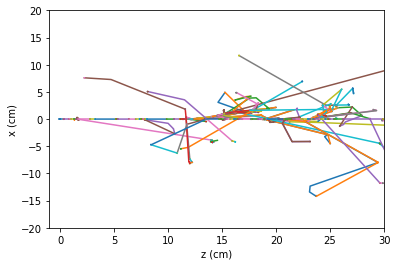

In [ ]:
# eerst halen we de lijsten op 
particles, xcoord, ycoord, zcoord = data_lists

# we lopen over alle deeltjes heen (de lengte van alle lijsten zou hetzelfde moeten zijn)
no_part = len(particles)

for tracks in range(no_part):
  plt.plot(zcoord[tracks], xcoord[tracks])
  plt.axis([-1,30,-20,20])
  plt.xlabel("z (cm)")
  plt.ylabel("x (cm)")
plt.show()

Het bovenste plaatje laat alle paden van de deeltjes zien die zijn ontstaan. De kleuren die zijn toegevoegd zijn random. Het lijkt nu bijvoorbeeld alsof de horizontale lijn op x = 0 bestaat uit allerlei verschillende deeltjes, terwijl deze lijn de muon aanduidt. Dit komt doordat FLUKA niet het pad van elk deeltje apart volgt, maar het pad wordt onderbroken op het moment dat het met de omgeving reageert: in het laatste geval wordt eerst een nieuw deeltje gevolgd, tot die stopt of opnieuw reageert, waarna FLUKA weer teruggaat naar het originele deeltje en daarvan het pad verder volgt. 

Een manier om deze verschillende paden met elkaar te verbinden is door voor elke generatie een vast kleur te kiezen, bijvoorbeeld de coordinaten die bij de muon horen zullen altijd blauw geplot worden. Door dit met een legenda te plotten is het duidelijk welke deeltjes ontstaan.

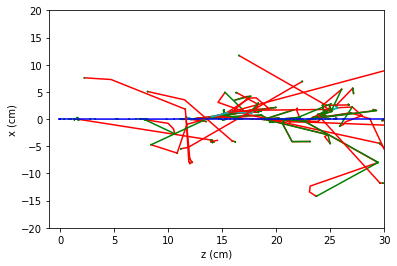

In [ ]:
colors_list = ['y','m','g','c','lime','violet','r','turquoise','darkcyan','b','tomato']
# bij deze lijst horen de generatiegetallen 1 tot 11
generation_list = ['proton', 'antiproton', 'electron', 'positron', 'electron antineutrino',\
                  'electron antineutrino', 'photon', 'neutron', 'antineutron', 'muon+', 'muon-']

# eerst halen we de lijsten op 
particles, xcoord, ycoord, zcoord = data_lists

# we lopen over alle deeltjes heen (de lengte van alle lijsten zou hetzelfde moeten zijn)
no_part = len(particles)
gen_legend = []
short_partlist = []

for tracks in range(no_part):

  # de deeltjesgeneratie kunnen we hiermee ophalen en verbinden aan een kleur
  part_gen = int(particles[tracks])
  # let op we kiezen (part_gen - 1) omdat de index van elke lijst op 0 begint 
  index = part_gen - 1
  color = colors_list[index]

  plt.plot(zcoord[tracks], xcoord[tracks], color)
  plt.axis([-1,30,-20,20])
  plt.xlabel("z (cm)")
  plt.ylabel("x (cm)")

#plt.legend(generatielijst)
plt.show()


We kunnen nu ook de getallen of de namen van de deeltjes toevoegen met een legenda. 

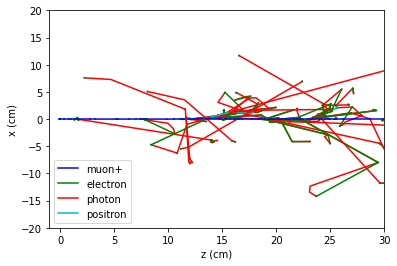

[10, 3, 7, 4]


In [ ]:
colors_list = ['y','m','g','c','lime','violet','r','turquoise','darkcyan','b','tomato']

# bij deze lijst horen de generatiegetallen 1 tot 11
generation_list = ['proton', 'antiproton', 'electron', 'positron', 'electron antineutrino',\
                  'electron antineutrino', 'photon', 'neutron', 'antineutron', 'muon+', 'muon-']

# eerst halen we de lijsten op 
particles, xcoord, ycoord, zcoord = data_lists

# we lopen over alle deeltjes heen (de lengte van alle lijsten zou hetzelfde moeten zijn)
no_part = len(particles)
gen_legend = []
short_partlist = []

for tracks in range(no_part):

  # de deeltjesgeneratie kunnen we hiermee ophalen en verbinden aan een kleur
  # let op we kiezen (part_gen - 1) omdat de index van elke lijst op 0 begint 
  part_gen = int(particles[tracks])
  index = part_gen - 1
  color = colors_list[index]

  if part_gen not in short_partlist:
    short_partlist.append(part_gen)

    generation_name = generation_list[index]
    gen_legend.append(generation_name)

  plt.plot(zcoord[tracks], xcoord[tracks], color)
  plt.axis([-1,30,-20,20])
  plt.xlabel("z (cm)")
  plt.ylabel("x (cm)")

#plt.legend(short_partlist)
plt.legend(gen_legend)

# het volgende zorgt ervoor dat de kleuren overeen komen
# dit is typisch iets dat je vind door te googlen
leg =  plt.gca().get_legend()
for i in range(len(short_partlist)):
  color_index = short_partlist[i] - 1
  leg.legendHandles[i].set_color(colors_list[color_index])
  
plt.show()
print(short_partlist)
